# Data Import & Cleaning

In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Data Import (not yet working)

In [3]:
!pwd
!ls -a

/content
.  ..  ACRM_data  .config  drive  sample_data


In [4]:
# Create local folder for data download
path = "ACRM_data"
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("Folder Created!")
else: print("Folder exists already!")

Folder exists already!


In [5]:
# jump in folder to download data there
#!cd "ACRM_data"
os.chdir("ACRM_data")
os.getcwd()


'/content/ACRM_data'

In [6]:
# Installing PyDrive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
# Get file_id
file_id = '1vGSA5OOABbL1QYFMUzHLa0T08fgeA19_'
fileDownloaded = drive.CreateFile({'id':file_id})

In [8]:
# Download files
fileDownloaded.GetContentFile('Lending_Club_modelling_data_part1.txt')
fileDownloaded.GetContentFile('Lending_Club_modelling_data_part2.txt')
fileDownloaded.GetContentFile('Lending_Club_modelling_data_part3.txt')
fileDownloaded.GetContentFile('Lending_Club_modelling_data_part4.txt')

In [9]:
file1 = os.path.join(os.getcwd(), 'Lending_Club_modelling_data_part1.txt')
file2 = os.path.join(os.getcwd(), 'Lending_Club_modelling_data_part2.txt')
file3 = os.path.join(os.getcwd(), 'Lending_Club_modelling_data_part3.txt')
file4 = os.path.join(os.getcwd(), 'Lending_Club_modelling_data_part4.txt')

In [10]:
df1 = pd.read_csv(file1, delimiter='\t')
#df1  = pd.read_csv(file1, delimiter='\t', encoding= 'unicode_escape')
#df1 = pd.read_csv(file1, delimiter='\t', encoding= 'utf-8')
#df1 = pd.read_csv(file1, delimiter='\t', encoding= 'ascii')
#df1 = pd.read_csv(file1, delimiter='\t', engine='c')

#df1.head()

UnicodeDecodeError: ignored

In [ ]:
# delete files from local /content folder again?

# concat df's

## Data Import (Placeholder since part above doesn't work yet)

In [14]:
## Read data
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Applied_Credit_Risk_Modeling/Applied_Credit_Risk")
folder = os.path.join(os.getcwd(), "Data/")
files = os.listdir(folder)

data_part1 = pd.read_csv(folder+files[0], delimiter='\t')
data_part2 = pd.read_csv(folder+files[1], delimiter='\t')
data_part3 = pd.read_csv(folder+files[2], delimiter='\t')
data_part4 = pd.read_csv(folder+files[3], delimiter='\t')

data_list = [data_part1, data_part2, data_part3, data_part4]
data = pd.concat(data_list)
data = data.reset_index(drop=True)
data.replace('nan',np.NaN)


## Handling wrong data

# Dropping distorted row (see below)
#data = data.drop(208166) # -> make this less static! (TBD) -> Collab
data = data.drop(109161) # -> make this less static! (TBD) -> VSCode

# Set type of numeric columns that weren't numeric
data["revol_util"] = pd.to_numeric(data["revol_util"])
data["total_acc"] = pd.to_numeric(data["total_acc"])
data["mort_acc"] = pd.to_numeric(data["mort_acc"])

C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_12796\3269431252.py:7: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_part2 = pd.read_csv(folder+files[1], delimiter='\t')


In [15]:
data
#data.sort_values('open_acc', ascending=False).head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,16,0.0,36369.0,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17,0.0,20131.0,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,13,0.0,11987.0,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,...,6,0.0,5472.0,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,13,0.0,24584.0,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,...,6,0.0,1990.0,34.3,23,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,...,6,0.0,43263.0,95.7,8,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,...,15,0.0,32704.0,66.9,23,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,...,9,0.0,15704.0,53.8,20,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


Handling of data:
*   Index 109161 (VSC) [or 208166 in Collab] distorted data bcs field "title" included also "dti" and others (mistake in .txt file) -> removed from dataset
*   3 columns that should be numeric aren't. Hence datatype made numeric:
 *   revol_util
 *   total_acc
 *   mort_acc
*   annual_inc: 1x 0 -> dti 9999 -> how to handle?

## Data Cleaning

### Summary Statistics (before)

In [16]:
# Data length and info
n_data = len(data)
print("Number of data points: "+str(n_data)+"\n")

data.info()

Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

In [18]:
# Summary for numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
describe = data.describe()
describe.loc['dtype'] = data.dtypes

describe

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,395753.00,396029.00,358234.00,395494.00
mean,14113.90,13.64,431.85,74203.24,17.38,11.31,0.18,15844.56,53.79,25.41,1.81,0.12
std,8357.45,4.47,250.73,61637.69,18.02,5.14,0.53,20591.86,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00
dtype,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64


Possible Outliers:
*   dti -> income=0, credit_card, charged off



In [19]:
# Count NaN
#pd.options.display.float_format = '{:.2%}'.format
nans = data.isnull().sum(axis = 0).to_frame()
nans["pct_nan"] =  nans / nans.sum()
nans["pct_nan_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans["pct_nan"]], index = nans.index)
nans

,0,pct_nan,pct_nan_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_title,22927,0.28,28.10%
emp_length,18301,0.22,22.43%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
issue_d,0,0.00,0.00%


In [20]:
# Value count for non-numeric data
vcs = dict()

for col in data.columns:
  if data[col].dtype == "object":
    vc = data[col].value_counts().to_frame()
    vc["pct"] =  vc[col] / vc[col].sum()
    vc["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc["pct"]], index = vc.index)
    vcs["vc {0}".format(col)] = vc
    display(vc)

,term,pct
36 months,302004,76.26%
60 months,94025,23.74%


,emp_title,pct
Teacher,4389,1.18%
Manager,4250,1.14%
Registered Nurse,1856,0.50%
RN,1846,0.49%
Supervisor,1830,0.49%
...,...,...
Postman,1,0.00%
"McCarthy & Holthus, LLC",1,0.00%
jp flooring,1,0.00%
Histology Technologist,1,0.00%


,emp_length,pct
10+ years,126040,33.37%
2 years,35827,9.48%
< 1 year,31725,8.40%
3 years,31665,8.38%
5 years,26495,7.01%
1 year,25882,6.85%
4 years,23952,6.34%
6 years,20841,5.52%
7 years,20819,5.51%
8 years,19168,5.07%


,home_ownership,pct
MORTGAGE,198347,50.08%
RENT,159790,40.35%
OWN,37746,9.53%
OTHER,112,0.03%
NONE,31,0.01%
ANY,3,0.00%


,verification_status,pct
Verified,139563,35.24%
Source Verified,131385,33.18%
Not Verified,125081,31.58%


,issue_d,pct
Oct-2014,14846,3.75%
Jul-2014,12609,3.18%
Jan-2015,11705,2.96%
Dec-2013,10618,2.68%
Nov-2013,10496,2.65%
...,...,...
Jul-2007,26,0.01%
Sep-2008,25,0.01%
Nov-2007,22,0.01%
Sep-2007,15,0.00%


,loan_status,pct
Fully Paid,318357,80.39%
Charged Off,77672,19.61%


,purpose,pct
debt_consolidation,234507,59.21%
credit_card,83019,20.96%
home_improvement,24029,6.07%
other,21185,5.35%
major_purchase,8790,2.22%
small_business,5701,1.44%
car,4697,1.19%
medical,4196,1.06%
moving,2854,0.72%
vacation,2452,0.62%


,title,pct
Debt consolidation,152472,38.67%
Credit card refinancing,51487,13.06%
Home improvement,15264,3.87%
Other,12930,3.28%
Debt Consolidation,11608,2.94%
...,...,...
Daughter's Wedding Bill,1,0.00%
gotta move,1,0.00%
creditcardrefi,1,0.00%
Debt/Home,1,0.00%


,earliest_cr_line,pct
Oct-2000,3017,0.76%
Aug-2000,2935,0.74%
Oct-2001,2896,0.73%
Aug-2001,2884,0.73%
Nov-2000,2736,0.69%
...,...,...
Jul-1958,1,0.00%
Nov-1957,1,0.00%
Jan-1953,1,0.00%
Jul-1955,1,0.00%


,initial_list_status,pct
f,238065,60.11%
w,157964,39.89%


,application_type,pct
INDIVIDUAL,395318,99.82%
JOINT,425,0.11%
DIRECT_PAY,286,0.07%


,address,pct
USNS Johnson\r\nFPO AE 05113,8,0.00%
USCGC Smith\r\nFPO AE 70466,8,0.00%
USS Johnson\r\nFPO AE 48052,8,0.00%
USS Smith\r\nFPO AP 70466,8,0.00%
USNS Johnson\r\nFPO AP 48052,7,0.00%
...,...,...
"455 Tricia Cove\r\nAustinbury, FL 00813",1,0.00%
"7776 Flores Fall\r\nFernandezshire, UT 05113",1,0.00%
"6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690",1,0.00%
"8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113",1,0.00%


### Useless Variables
*   Paper: If train/test split 70/30 -> don’t use variables having >= 30% missing values -> we could do that 
*   Dropping useless variables: 
 * title
 * earliest_cr_line
 * address



In [22]:
# Dropping useless variables
data_cleand = data.drop(['title', 'earliest_cr_line', 'address'], axis=1)

# Dropping variables having more than train_ratio% of nan values
train_ratio = 0.7
test_ratio = 0.3
data_cleand = data_cleand.loc[:, nans["pct_nan"] <= test_ratio]
data_cleand


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,...,vacation,26.24,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,...,debt_consolidation,22.05,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,0.00
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,...,credit_card,12.79,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,...,credit_card,2.60,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,...,credit_card,33.95,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,Oct-2015,...,debt_consolidation,15.63,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,Feb-2015,...,debt_consolidation,21.45,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,0.00
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,Oct-2013,...,debt_consolidation,17.56,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,Aug-2012,...,debt_consolidation,15.88,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,0.00


### Data Visualizations (TBD)
For all factors plot:
* Distribution
* Boxplot

To visualize outliers and show in presentation
-> outliers removed or winsorized


In [ ]:
### -> runs too long 

# Plotting Distribution for all non-numeric factors
fig, axes = plt.subplots(ncols=len(data_cleand.columns), figsize=(10,5))
for col, ax in zip(data_cleand, axes):
    data_cleand[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()

Text(0, 0.5, 'Frequency')

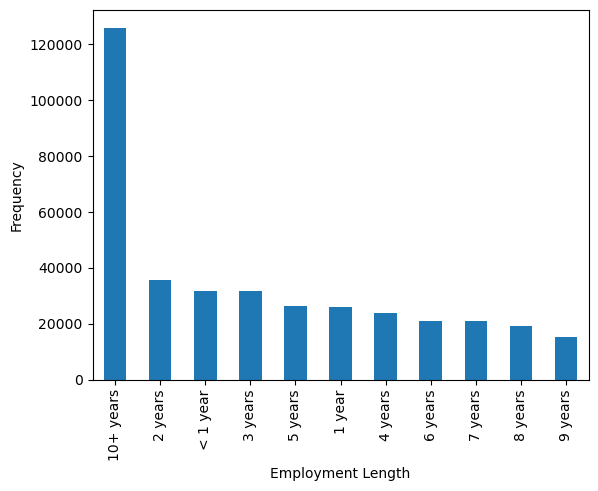

In [25]:
# Pltotting distribution for emp_length
data_cleand["emp_length"].value_counts().plot(kind = 'bar')
plt.xlabel('Employment Length') 
plt.ylabel('Frequency') 

# Plotting Distribution for non-numeric data

#nonnumeric_plots = dict()

# for col in data.columns:
#   if data[col].dtype == "object":
#     data[col].value_counts().plot(kind = 'bar')


# Plotting Distribution for numeric data

### Missing and wrong values (TBD)
* Wrong row was already deleted. 
* Numeric NaN values: Replacing nan values with column means
* Non-numeric NaN values: Replacing nan values with category that has highes value count? (TBD)

In [ ]:
# Numeric data: Replacing nan values with column means (revol_util)
for col in data_cleand.columns:
  if not data_cleand[col].dtype == "object":
    data_cleand[col] = data_cleand[col].fillna(data_cleand[col].mean())

# Non-Numeric data: Replacing nan values with category that has highes value count? (emp_title, emp_length, title)

data_cleand

<ipython-input-35-869f9ba7ea08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleand[col] = data_cleand[col].fillna(data_cleand[col].mean())


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address
0,16000,60 months,23.28,453.63,Fastenal Company,10+ years,MORTGAGE,45000.00,Verified,May-2013,...,Mar-2000,9,0.00,12685.00,49.90,19,f,INDIVIDUAL,0.00,"19980 Rivera Plain\r\nColonton, LA 00813"
1,10000,36 months,7.89,312.86,Staff Attorney,5 years,RENT,100000.00,Verified,Feb-2016,...,Dec-1996,6,1.00,901.00,4.00,14,w,INDIVIDUAL,1.00,"85291 Howell Greens\r\nPort Amandaville, VA 29597"
2,18000,36 months,8.90,571.56,BNY MELLON,2 years,RENT,43000.00,Verified,May-2012,...,Nov-2002,6,0.00,18921.00,90.10,13,f,INDIVIDUAL,0.00,"401 Pratt Stream\r\nSouth Jamesberg, NH 22690"
3,11075,36 months,14.46,381.00,NaN,NaN,MORTGAGE,23100.00,Verified,Mar-2016,...,Jul-1998,9,0.00,4683.00,57.80,14,w,JOINT,0.00,"195 Park Grove\r\nNew Stacey, TX 30723"
4,20000,36 months,9.49,640.57,Sergeant,8 years,MORTGAGE,130000.00,Source Verified,Nov-2014,...,May-2004,7,0.00,12767.00,86.90,20,f,INDIVIDUAL,0.00,"2834 Logan Port\r\nEast Paulborough, WY 22690"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,18000,60 months,16.29,440.51,HJ Foundation,6 years,MORTGAGE,46072.00,Verified,May-2013,...,Aug-2000,15,0.00,12989.00,57.00,28,f,INDIVIDUAL,0.00,"754 Wilson Divide\r\nNorth Laurenport, WA 93700"
396026,8000,36 months,7.62,249.30,BD Director,1 year,MORTGAGE,70000.00,Not Verified,Feb-2014,...,Dec-1999,12,0.00,27157.00,29.30,20,w,INDIVIDUAL,0.00,"0625 Murphy Islands Apt. 842\r\nNorth Dwayne, ..."
396027,24000,60 months,14.47,564.31,NaN,10+ years,MORTGAGE,200000.00,Source Verified,Jan-2014,...,Oct-1997,12,0.00,15597.00,29.80,31,f,INDIVIDUAL,0.00,"044 Courtney Parks Apt. 449\r\nBradleystad, MN..."
396028,25000,36 months,14.61,861.88,TriNet,< 1 year,RENT,120000.00,Verified,Oct-2009,...,Jun-1994,9,0.00,78468.00,84.30,18,f,INDIVIDUAL,0.00,1804 James Landing Suite 300\r\nNew Jillianpor...


In [ ]:
# Count nan again
nans2 = data_cleand.isnull().sum(axis = 0).to_frame()
nans2["pct_nan"] =  nans2 / nans2.sum()
nans2["pct_nan_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans2["pct_nan"]], index = nans2.index)
nans2

,0,pct_nan,pct_nan_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_title,22927,0.53,53.34%
emp_length,18301,0.43,42.58%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
issue_d,0,0.00,0.00%


### Outliers
Delete outliers or winsorize them \
Boxplot 5% / 95% \
-> Reduces sensitivity of model to outliers 

### Data Normalization
Standardization, Normalization or Binning approach

### Summary Statistics (final)

### Data Visualizations
Final of used factors \
(for ppt)

## Correlation Analysis Variables
Create correlation matrix